# 4.Unsupervised Learning

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [24]:
# load cleaned dataset

df = pd.read_csv("cleaned_flipkart_home_theatres_og_copy.csv")

In [25]:
# select features for clustering

features = df[['Price', 'Discount', 'Rating', 'Number of Reviews']]

In [26]:
# standardize the features

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [27]:
# determine the optimal number of clusters using silhouette scores

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(score)

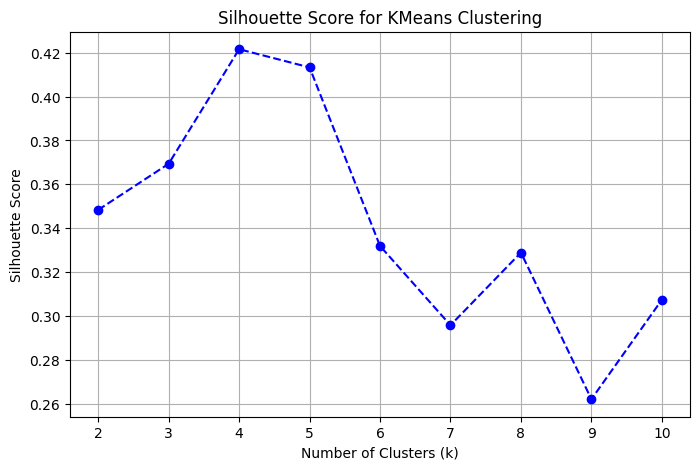

In [28]:
# plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='blue')
plt.title("Silhouette Score for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [29]:
# applying KMeans with the optimal number of clusters

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_Label'] = kmeans_final.fit_predict(scaled_features)

In [30]:
# save the clustered dataset
df.to_csv("clustered_home_theatres.csv", index=False)

In [31]:
# display cluster labeled data

print(df[['Price', 'Discount', 'Rating', 'Number of Reviews', 'Cluster_Label']].head())


   Price  Discount  Rating  Number of Reviews  Cluster_Label
0    813        88     3.9               2128              0
1   1619        67     3.6               1796              0
2    965        56     3.9               7048              0
3   2299        34     3.7               9082              1
4    972        48     3.6                955              0


# 5.Supervised Learning

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


In [33]:
# load the clustered dataset

df = pd.read_csv("clustered_home_theatres.csv")

In [34]:
# features and target

X = df[['Price', 'Discount', 'Rating', 'Number of Reviews']]
y = df['Cluster_Label']

In [35]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# initialize models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [38]:
# Train and evaluate models

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((name, accuracy, f1))

C:\Users\Makesh\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [16:22:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
# Print results

print("Model Evaluation Results:\n")
for name, acc, f1 in results:
    print(f"{name}: Accuracy = {acc:.4f}, F1 Score = {f1:.4f}")


Model Evaluation Results:

Logistic Regression: Accuracy = 1.0000, F1 Score = 1.0000
SVM: Accuracy = 0.9800, F1 Score = 0.9704
k-NN: Accuracy = 0.9800, F1 Score = 0.9701
Random Forest: Accuracy = 0.9800, F1 Score = 0.9704
XGBoost: Accuracy = 0.9600, F1 Score = 0.9536


# 6.Hyperparameter Tuning for Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [41]:
# define the parameter grid

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [42]:
# initialize model

rf = RandomForestClassifier(random_state=42)

In [43]:
# Grid Search setup
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\Makesh\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [44]:

# best model evaluation

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.98
F1 Score: 0.9703703703703703
